In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SMSCollection.csv')
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

Class    0
sms      0
dtype: int64

In [6]:
df.describe(include='O')

,Class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.rename(columns={'Class':'target'},inplace=True)

In [8]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [10]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

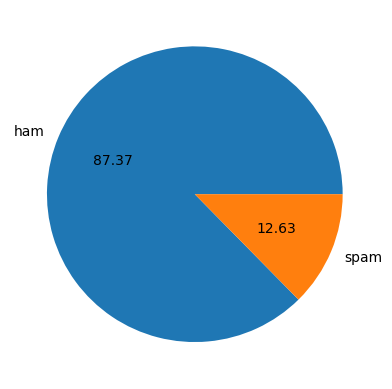

In [15]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [16]:
# Data is imbalanced
!pip install nltk

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
df['char_length'] = df['sms'].apply(len)

In [20]:
df.head()

,target,sms,char_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,sms,char_length,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,sms,char_length,words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['char_length','words','num_sentences']].describe()

,char_length,words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344554,18.591023,1.954924
std,58.437457,13.402840,1.366937
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
df[df['target']==0][['char_length','words','num_sentences']].describe() # ham

,char_length,words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.264836,1.806244
std,56.715046,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# spam
df[df['target']==1][['char_length','words','num_sentences']].describe()

,char_length,words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.983155
std,29.821348,6.993008,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='char_length', ylabel='Count'>

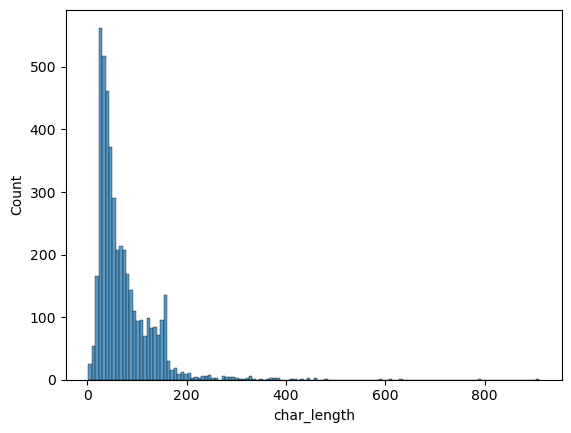

In [28]:
sns.histplot(df[df['target']==0]['char_length'])

<AxesSubplot:xlabel='char_length', ylabel='Count'>

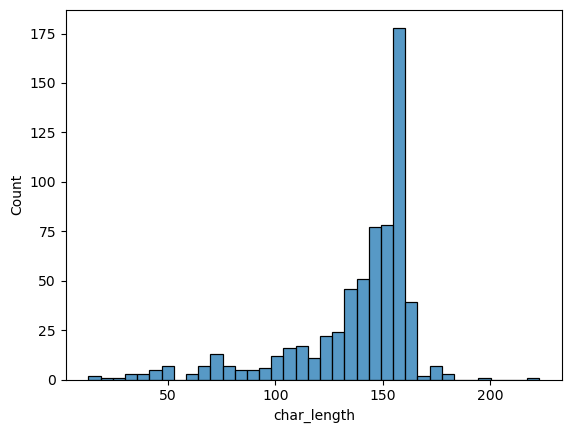

In [29]:
sns.histplot(df[df['target']==1]['char_length'])

<AxesSubplot:xlabel='char_length', ylabel='Density'>

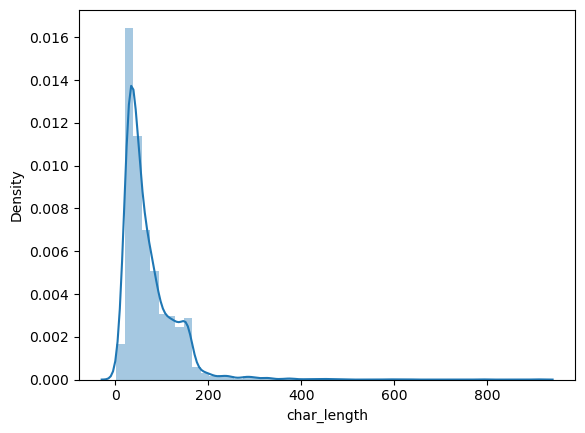

In [30]:
sns.distplot(df[df['target']==0]['char_length'])

<AxesSubplot:xlabel='char_length', ylabel='Count'>

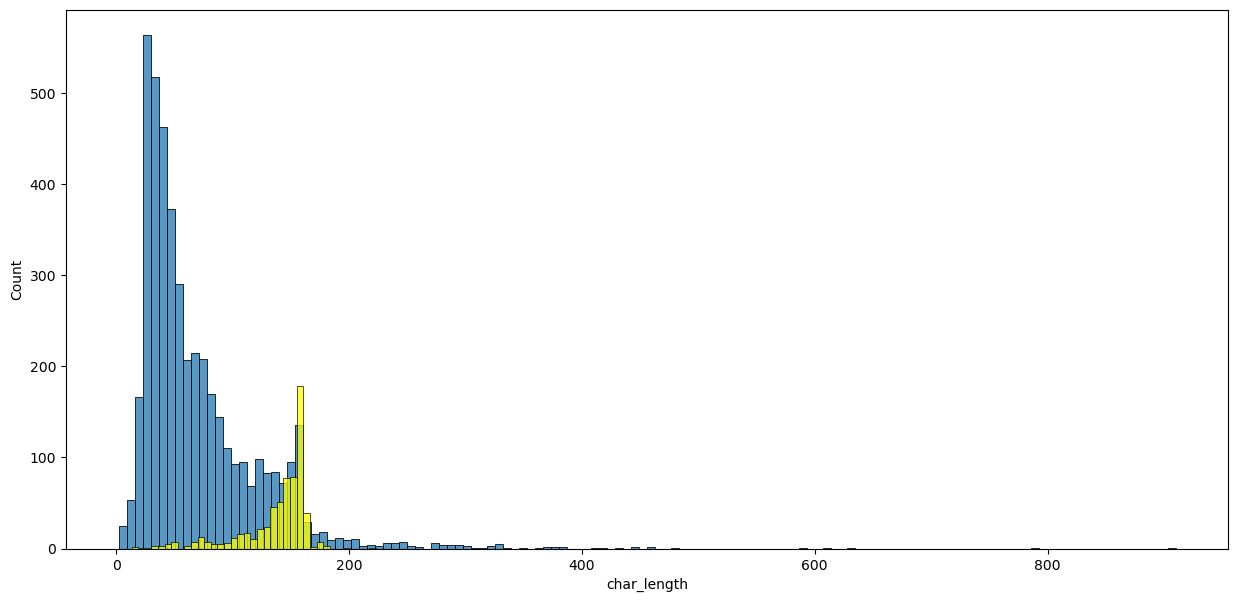

In [31]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['char_length'])
sns.histplot(df[df['target']==1]['char_length'],color='yellow')

<AxesSubplot:xlabel='words', ylabel='Count'>

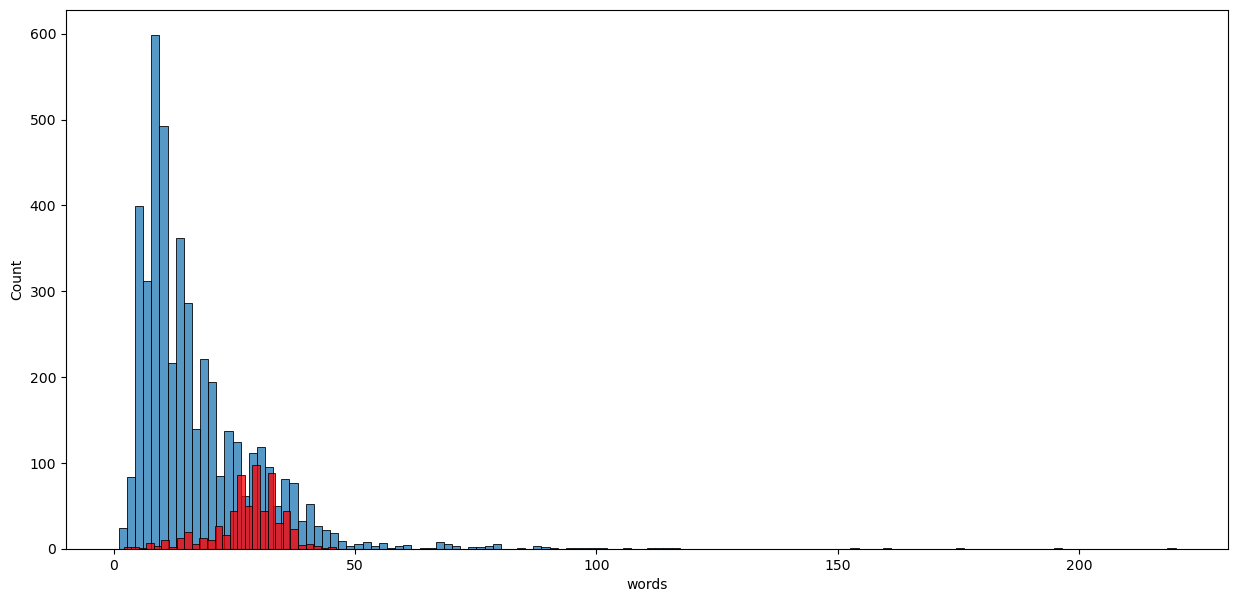

In [32]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')

<AxesSubplot:>

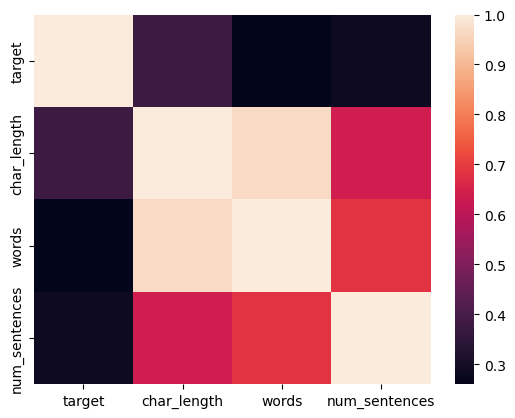

In [33]:
sns.heatmap(df.corr())

In [34]:
# Data preprocessing - lowercase,tokenization,removing special character,removing stop words and punctuation , stemming

In [35]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [36]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lover')

'lover'

In [37]:
def lower(sms):
    sms = sms.lower()
    sms = nltk.word_tokenize(sms)
    
    y = []
    for i in sms:
        if i.isalnum():
            y.append(i)
    sms = y[:]
    y.clear()
    
    for i in sms:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
     
    sms = y[:]
    y.clear()
    
    for i in sms:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [38]:
lower('Go to hell and start playing there. how are you?')

'go hell start play'

In [39]:
df['sms'][1]

'Ok lar... Joking wif u oni...'

In [40]:
lower('Ok lar... Joking wif u oni...')

'ok lar joke wif u oni'

In [41]:
df['sms'].apply(lower)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: sms, Length: 5169, dtype: object

In [42]:
df['transformed_text'] = df['sms'].apply(lower)

In [43]:
df.head()

,target,sms,char_length,words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
!pip install wordcloud

In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


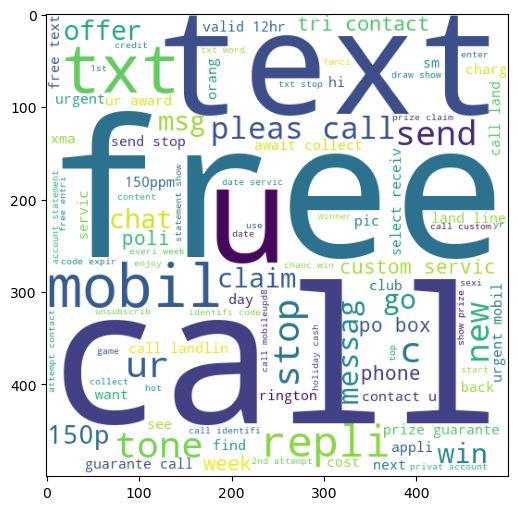

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

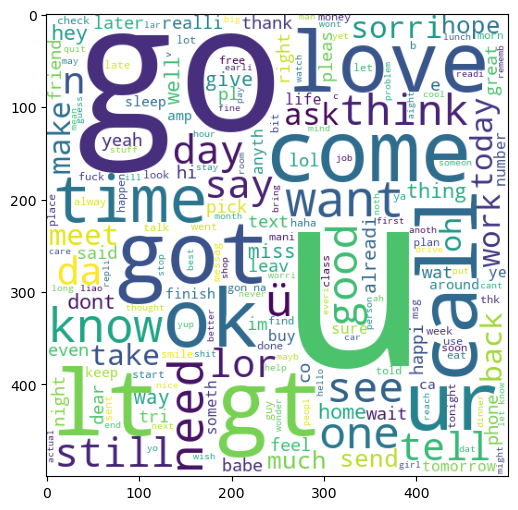

In [48]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head()

,target,sms,char_length,words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [51]:
len(spam_corpus)

9982

In [52]:
from collections import Counter

In [53]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [54]:
(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

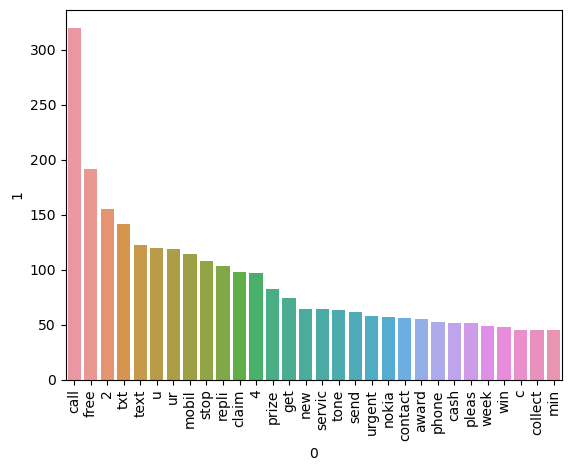

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

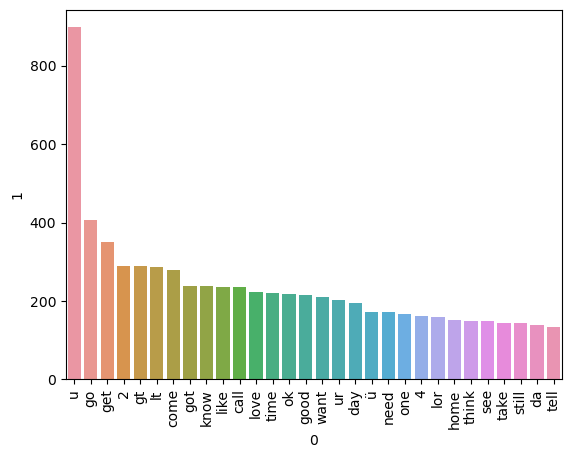

In [57]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
len(ham_corpus)

35929

In [59]:
# Model Building

In [82]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [83]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [ ]:
x.shape

In [85]:
y = df['target'].values

In [86]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [91]:
mnb.fit(x_train,y_train)
ypred = mnb.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(precision_score(y_test,ypred))

0.9593810444874274
[[908   0]
 [ 42  84]]
1.0


In [92]:
def mymodel(model):
    # model creation
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    
    train = model.score(x_train,y_train)
    test = model.score(x_test,y_test)
    print(f"Training accuracy is: {train}\nTesting accuracy is:{test}")
    
    print(classification_report(y_test,ypred))
    print(confusion_matrix(y_test,ypred))
    print(precision_score(y_test,ypred))

In [93]:
from sklearn.metrics import classification_report

In [94]:
!pip install xgboost

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [96]:
dtc = mymodel(DecisionTreeClassifier(max_depth=5))

Training accuracy is: 0.9530834340991535
Testing accuracy is:0.9400386847195358
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       908
           1       0.84      0.63      0.72       126

    accuracy                           0.94      1034
   macro avg       0.90      0.81      0.84      1034
weighted avg       0.94      0.94      0.94      1034

[[893  15]
 [ 47  79]]
0.8404255319148937


In [97]:
knn = mymodel(KNeighborsClassifier())

Training accuracy is: 0.9163240628778718
Testing accuracy is:0.9100580270793037
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       908
           1       1.00      0.26      0.42       126

    accuracy                           0.91      1034
   macro avg       0.95      0.63      0.68      1034
weighted avg       0.92      0.91      0.89      1034

[[908   0]
 [ 93  33]]
1.0


In [98]:
rfc = mymodel(RandomForestClassifier(n_estimators=50,random_state=2))

Training accuracy is: 1.0
Testing accuracy is:0.9671179883945842
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       908
           1       0.99      0.74      0.85       126

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.97      0.97      0.97      1034

[[907   1]
 [ 33  93]]
0.9893617021276596


In [99]:
bc = mymodel(BaggingClassifier(n_estimators=50,random_state=2))

Training accuracy is: 0.999758162031439
Testing accuracy is:0.9622823984526112
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       908
           1       0.87      0.81      0.84       126

    accuracy                           0.96      1034
   macro avg       0.92      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034

[[893  15]
 [ 24 102]]
0.8717948717948718


In [100]:
gbc = mymodel(GradientBoostingClassifier(n_estimators=50,random_state=2))

Training accuracy is: 0.9666263603385732
Testing accuracy is:0.9487427466150871
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       908
           1       0.93      0.63      0.75       126

    accuracy                           0.95      1034
   macro avg       0.94      0.81      0.86      1034
weighted avg       0.95      0.95      0.94      1034

[[902   6]
 [ 47  79]]
0.9294117647058824


In [103]:
import pickle
